# Session 6 Exercises

These are the exercises from the Session 6 notes

In [124]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

## 3. The classical wave equation

### In-class

1. Create an update function based on the equations above; you can follow the specification below if you want. It should take as parameters two arrays, $\theta_n$ (the wave at all $x$ points for timestep $n$) and $\theta_{n-1}$ (the wave at all $x$ points for timestep $n-1$), and the value of $r$. It should return a new array $\theta_{n+1}$. You may find `np.roll` useful (it’s worth thinking briefly at this point about how np.roll might be used when the wave is not periodic: how would you adapt it?)

In [60]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
   """Docstring...
   Inputs: 
   theta_n   Wave at time t_n     = n*dt
   theta_nm1 Wave at time t_{n-1} = (n-1)*dt
   r         Constant (c dt/dx)
   Output:
   theta at time t_{n+1} = (n+1)*dt """
   theta_np1 = 2*(1-r**2)*theta_n - theta_nm1 + r**2 * (np.roll(theta_n, 1) + np.roll(theta_n, -1))
   return theta_np1

2. We will now test this function on a simple sine wave. Set up frequency $f$=1Hz, wavelength $\lambda$=1m (though do NOT use a variable named `lambda`), and calculate speed, wavevector and angular frequency from these. Now define the number of points in a wavelength to be 20, and set up an array for $x$ that will hold *three* wavelengths.

a. For $r$=0.1, calculate $\Delta t=r\Delta x/c$, evaluate the wave analytically at the first two time steps (use $\sin(kx-\omega t)$ for $t=0$ and $t=\Delta t$) and propagate the wave for 200 steps using a simple for loop and your update function. 
    
(Note that, if you don’t store the wave at each timestep, after each call to the update function you will need to update your variables; if you have `theta_0`, `theta_1` and `theta_n`, say, then you will need to set `theta_0 = theta_1` etc after each update.) 

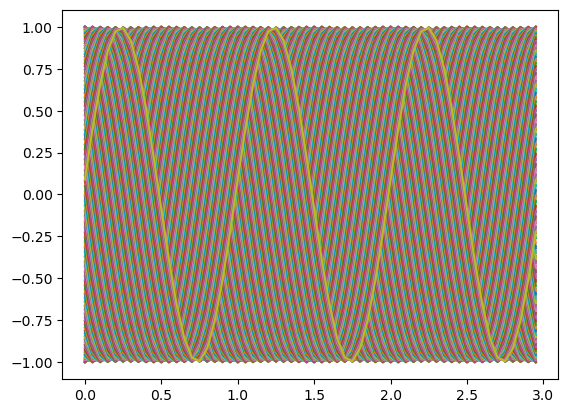

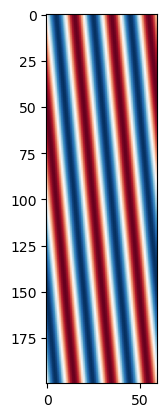

In [61]:
l = 1
f = 1
r = 0.1
dx = 0.05

k = 2*np.pi
omega = 2*np.pi
x = np.arange(0, 3, dx)

c = f * l
dt = r * dx/c

theta = np.zeros((200,60))
theta[0] = np.sin(k*x)
theta[1] = np.sin(k*x - omega*dt)


for i in range(1,199):
    theta[i+1] = explicit_wave_eq_update(theta[i], theta[i-1], r)
    
for i in range(199):
    plt.plot(x, theta[i])

plt.figure()
plt.imshow(theta, cmap='RdBu')

b. Plot the final wave along with the expected form at the final time (be sure you have the correct value for the final time): how well do they agree?

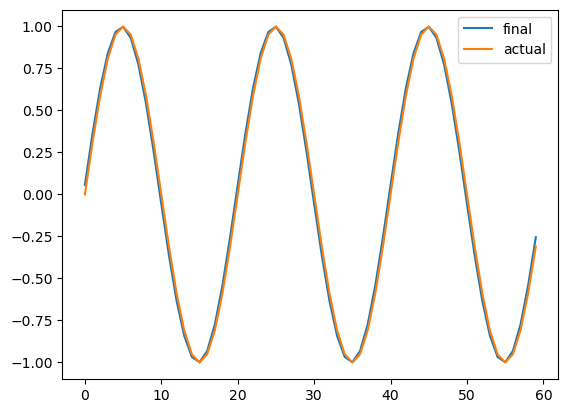

In [63]:
plt.plot(theta[-1], label='final')
plt.plot(np.sin(k*np.arange(0,3,dx)), label='actual')
plt.legend()

c. If you stored the wave at every timestep, make a 2D plot (x vs t) using `plt.imshow`; what do you think that you learn from this?

d. Now explore values of $r$ from $r=0.01$ to $r=0.5$ and note how the error changes; you should plot the difference between the numerical and analytic values to make it clearer.

3. Now for $r=0.1$, test the effect of varying $N_\lambda$, the number of points in a wavelength (which of course sets $dx$). Try values between 5 and 50. Again, propagate the wave for 200 steps and compare to the expected form; note both the shape of the wave, and the location of the peaks.

### Further work

1. We now want to explore the effect of discretisation on the phase velocity of the wave. For $r=0.1$, run a wave over a time interval of 1.5s with $N_\lambda=5$ and $N_\lambda=20$, keeping only the final waveform in both cases. (Note that you will need to use `int(1.501/dt)` to find the number of timesteps, as we start at $t=0$.) Plot the two, along with the initial waves (which should be identical) on different subplots. You should see that the relationship between the initial and final waves is somewhat different in the two cases.

## 4. The wave equation in 2D

### In-class

1. Extend your solver from Section 3 (above) to work for two dimensions (for two dimensions, use `np.roll(array,n,axis=0)` for the $x$ derivatives (setting `n=1` or `n=-1` as appropriate) and `np.roll(array,n,axis=1)` for the $y$ derivatives). The change to the derivative is the only change that you need make.

In [64]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
   """Docstring...
   Inputs: 
   theta_n   Wave at time t_n     = n*dt
   theta_nm1 Wave at time t_{n-1} = (n-1)*dt
   r         Constant (c dt/dx)
   Output:
   theta at time t_{n+1} = (n+1)*dt """
   theta_np1 = 2*(1-r**2)*theta_n - theta_nm1 + r**2 * (np.roll(theta_n, 1, axis=0) + np.roll(theta_n, 1, axis=0) 
      + np.roll(theta_n, -1, axis=0) + np.roll(theta_n, -1, axis=1))
   return theta_np1

2. Create a two-dimensional space (i.e. $x$ and $y$ arrays) to hold the wave, with both $x$ and $y$ covering three wavelengths with appropriate grid spacing (choose a number of points). Use `np.meshgrid` to create appropriate 2D arrays for $x$ and $y$. (Use a wavelength of 1m again.)

In [65]:
x = np.arange(0, 3, dx)
y = np.arange(0, 3, dx)

x2D, y2D = np.meshgrid(x, y)

3. Create an initial wave that is made from a sine wave in $x$ and $t$, `np.sin(wavevector*x2d - ang_freq*t)`, multiplied by a Gaussian function in $y$: `np.exp(-(y2d-midy)**2/sigma)`. Set `midy` to be the middle of the domain in $y$, and `sigma=1.0`. Set the function to be zero for $x>1m$ *and* at $x=0$. Plot this with `plt.imshow` to check (and try the 3D plot as well if you like). It should look something like the figure in the notes.

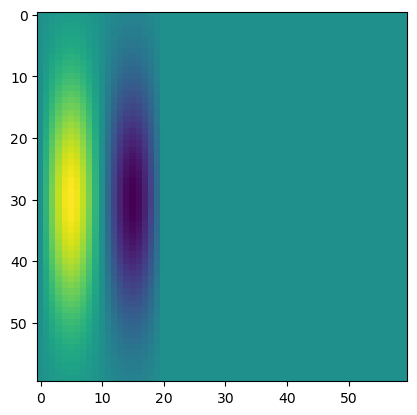

In [66]:
sigma = 1
x2D[x2D > 1] = 0
x2D[x2D == 0] = 0
theta2_0 = np.sin(k*x2D) * np.exp(-(y2D-1.5)**2/sigma)


plt.imshow(theta2_0)

4. Using $r=0.2$, calculate $\Delta t$ (the wave speed comes from the wavelength and frequency, and then you use $\Delta x$). Create the wave at $t=\Delta t$ as well, and set both waves to be zero for $y=0$ and $y=3m$ (N.B. these are boundary conditions, which you will have to enforce at every step). Using your 2D solver, propagate the wave forward in time by 100 steps and plot it using `plt.imshow` to check that it is moving. Be sure to enforce the boundary conditions.

In [ ]:
r = 0.2

5.	(Depending on how you get on, this could be treated as part of the further work.) Now use the `plt.figure` approach from Matplotlib to create subplots containing snapshots of the wave with time (I found 1,200 iterations was enough to get interesting propagation). If you create an initial figure (I found that passing the optional parameter `figsize=(10,6)` was helpful) then you can add subplots at every M steps (use `%` on the timestep to take the modulus; I did it 100 steps) using a command like `ax = fig.add_subplot(r,c,i)` where there are `r` rows, `c` columns and `i` is the index of the plot. Then you can display each snapshot of the wave with `ax.imshow`.

### Further work

1. Now we will introduce a scatterer. We do this by stopping the wave from having any amplitude in part of the simulation (i.e. by setting part of the waves to zero): choose a square in the middle of the domain, using array slicing. I used `theta[mid-width:mid+width, mid-width:mid+width] = 0.0` for both $\theta_n$ and $\theta_{n-1}$ to enforce this at each step with `width=5`. Using the same initial wave as above, propagate and plot over appropriate time (until the initial wave reaches the right hand side – around 1,200 steps). You should see a circular wave emerging from the scatterer as the initial pulse passes. You might like to experiment with different sizes and shapes for the scatterer.

## 6. Time-dependent Schrödinger equation

### In-class

1. For $-100<x<100$ with $\Delta x=0.5$, create an array of positions and then build the initial wavefunction $\psi(x,0)=\exp(ikx)\exp(-(x-x_0 )^2/\sigma^2 )$, with $k=1$, $x_0=-75$ and $\sigma=1$. Make a plot of the real and imaginary parts to check that this looks sensible. (Make sure that both ends of the array are set to zero to establish the initial boundary conditions.)

400


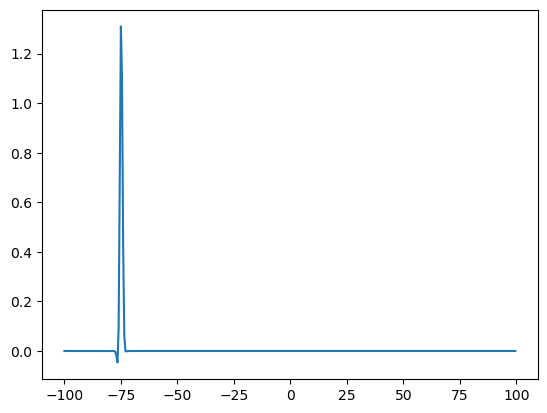

In [101]:
k = 1
x_0 = -75
sigma = 1
dx = 0.5

x = np.arange(-100, 100, dx)
psi_0 = np.exp(1j*k*x)*np.exp(-(x-x_0)**2/sigma**2)

print(len(psi_0))

plt.plot(x, np.real(psi_0) + np.imag(psi_0))
#plt.plot(x, np.real(psi_0))

2. Write functions to create the matrices $\mathbf{M}$ and $\mathbf{N}$ following the instructions in the notes (note that this should be very similar to the work from Session 5). You will need to pass an array of potential values; the interface should be something like that given below.

In [84]:
def calc_M(N,zeta,V,dt):
    """Docstring...
    Inputs: 
    N    size of matrix
    zeta parameter
    V    potential (array)
    dt   time step
    Outputs:
    (NxN) matrix"""
    maindiag = np.full(N, 2*(2+zeta*1j)) + np.full(N, 2*1j * dt * V)
    offdiag = np.full(N-1, -zeta*1j)
    output = np.diag(maindiag) + np.diag(offdiag, k=1) + np.diag(offdiag, k=-1)
    return output

def calc_N(N,zeta,V,dt):
    """Docstring...
    Inputs: 
    N    size of matrix
    zeta parameter
    V    potential (array)
    dt   time step
    Outputs:
    (NxN) matrix"""
    maindiag = np.full(N, 2*(2+zeta*1j)) - np.full(N, 2*1j * dt * V)
    offdiag = np.full(N-1, zeta*1j)
    output = np.diag(maindiag) + np.diag(offdiag, k=1) + np.diag(offdiag, k=-1)
    return output

3. For a potential $V(x)=0$, create an array of the values of the potential. Set $\Delta t=0.1$ and calculate $\zeta$ (zeta) and both matrices $\mathbf{M}$ and $\mathbf{N}$. Invert $\mathbf{M}$ using `np.linalg.inv` and calculate the product $\mathbf{M}^{-1}\mathbf{N}$ using `np.dot`. Note that, in this case, we have $\mathbf{b}=0$ because we are setting the ends to zero (hard walls), so we don’t need to calculate $\mathbf{M}^{-1} \mathbf{b}$.

In [95]:
N = 400
V = np.zeros(N)
dt = 0.1

zeta = dt/dx**2

M = calc_M(N, zeta, V, dt)
N = calc_N(N, zeta, V, dt)
M_inv = np.linalg.inv(M)
M_inv_N = np.dot(M_inv, N)

4.	Now propagate the wavefunction forward in time for 1000 steps using a `for` loop and an update step like `psi_next = np.dot(M_inv_N,psi_now)`. Either create a set of subplots as you go along, or store the results and plot them to ensure that you see the wave propagating.

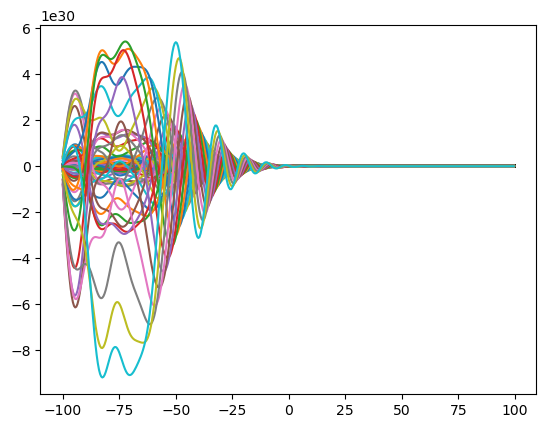

In [127]:
psi = np.zeros((1000, 400), dtype=complex)
psi[0] = psi_0

for i in range(0,999):
    psi[i+1] = np.dot(M_inv_N, psi[i])

for i in range(1000):
    plt.plot(x, psi[i])


### Further work

1. Extend your solver from the in-class work to include a barrier with height 0.5 at x=0 (you will only change the potential array); experiment with the width. Note that you will have to recalculate the matrices $\mathbf{M}$ and $\mathbf{M}^{-1} \mathbf{N}$ for each different barrier that you create.

2.	You might also try creating a step (rather than a barrier) and exploring the effect on the wave.  You should know (roughly) what will happen from your quantum mechanics course last term.

## 7. Time-independent Schrödinger equation

(Note that this is essentially a revision of a boundary value problem solver for an ODE, and parallels the assignment for week 4.)

The second-order finite difference formula from the notes is:

$$\psi_{i+1} = 2\psi_{i} - \psi_{i-1} + 2\Delta x(V_{i} - E)\psi_{i} $$

### In-class

1. Write a simple integration function based on the second-order finite difference update given in the notes (and briefly repeated above). Your function should take as parameters: $\psi_0$ and $\psi_1$; an array of the potential $V_i$; the energy, $E$; and the grid spacing and length $\Delta x$ and $N_x$. It should return an array containing the wavefunction for all grid points.

2. We are going to solve for the eigenvalues and wavefunctions for an infinite square well. Create an $x$ array from -5 to 5 using an appropriate number of points (you may need to test this later), along with an array of the potential, which you should set to zero. Create the starting values of the wavefunction, $\psi_0=0.0$ and $\psi_1=a$, where $a$ is an arbitrary number.

3. For $E=0$ and $E=0.1$ call your solver, store the output wavefunctions and plot against $x$ to check that it works. (You should be able to deduce the form with $E=0$ just by looking at the equation.)

4. Now write a simple bisection or secant solver. You will need to use the value of the wavefunction at $x=5$, given by the last element in the array, $\psi_{i-1}$, as $f(x)$ and the energy $E$ as $x$. This can be written quite simply by adapting your code from Session 2. Use the energy window specified above, and be sure to write out the number of iterations required. Plot the final wavefunction (you may have to calculate it again after the secant has finished).

    Compare your answer for the energy to the exact result: $0.5(\pi^2/L^2) Ha$.


### Further work

1.	Consider ways to scan roughly over the energy, and identify brackets for different eigenstates. (You should think about nodes in the wavefunction.) Once a pair of energies bracketing an eigenstate has been identified, the bisection or secant methods can be used to find it. You might like to plot the first few eigenstates for the square well, or add another potential into the well.